In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%matplotlib inline

np.random.seed(1)

error_x = 0.1
error_y = error_x / 5
x = np.zeros(300)
y = np.zeros(300)

for i in range(1, 300):
    x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
    
for i in range(10, 100):
    y[i] = x[i-10] + error_y * np.random.randn(1)
    
for i in range(100, 200):
    y[i] = -x[i-5] + error_y * np.random.randn(1)
    
for i in range(200, 300-5):
    y[i] = x[i+5] + error_y * np.random.randn(1)
    
x = standardize(x)
y = standardize(y)

/tmp/ipykernel_11602/947220314.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
/tmp/ipykernel_11602/947220314.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = x[i-10] + error_y * np.random.randn(1)
/tmp/ipykernel_11602/947220314.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = -x[i-5] + error_y * np.random.randn(1)
/tmp/ipykernel_11602/947220314.py:23: DeprecationWarning: Conversion of an

In [2]:
df = pl.DataFrame({
    "x": x,
    "y": y
})


In [3]:
df['x']

x
f64
-0.204519
1.153047
0.234494
-0.338635
-1.195147
…
-0.588968
-0.722157
-0.218101


In [4]:
df

x,y
f64,f64
-0.204519,0.057934
1.153047,0.057934
0.234494,0.057934
-0.338635,0.057934
-1.195147,0.057934
…,…
-0.588968,0.057934
-0.722157,0.057934
-0.218101,0.057934


In [5]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [6]:
from lattice_polars import partition_function, average_path

In [7]:
# from thermal_optimal_path.lattice import partition_function
# from thermal_optimal_path.statistics import average_path

temperature = 0.1

g = partition_function(df['x'], df['y'], temperature)

In [8]:
g.head

<bound method DataFrame.head of shape: (300, 300)
┌───────┬───────────┬───────────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ col_0 ┆ col_1     ┆ col_2     ┆ col_3      ┆ … ┆ col_296    ┆ col_297    ┆ col_298   ┆ col_299   │
│ ---   ┆ ---       ┆ ---       ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ f64   ┆ f64       ┆ f64       ┆ f64        ┆   ┆ f64        ┆ f64        ┆ f64       ┆ f64       │
╞═══════╪═══════════╪═══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 1.0   ┆ 1.0       ┆ 0.0       ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 1.0   ┆ 0.000019  ┆ 0.000006  ┆ 3.8306e-11 ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 0.0   ┆ 0.732188  ┆ 0.536108  ┆ 0.392529   ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 0.0   ┆ 0.151922  ┆ 0.294681  ┆ 0.253826   ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 0.0   ┆ 2.3029e-8 ┆ 6.7699e-8 ┆ 8.3147e

In [9]:
# from thermal_optimal_path.statistics import average_path
avg = average_path(g)

In [10]:
pl.DataFrame().select(avg.alias("avg"))

avg
f64
0.0
0.0
0.0
-0.999983
-0.441614
…
-3.779686
-1.473696
0.175541


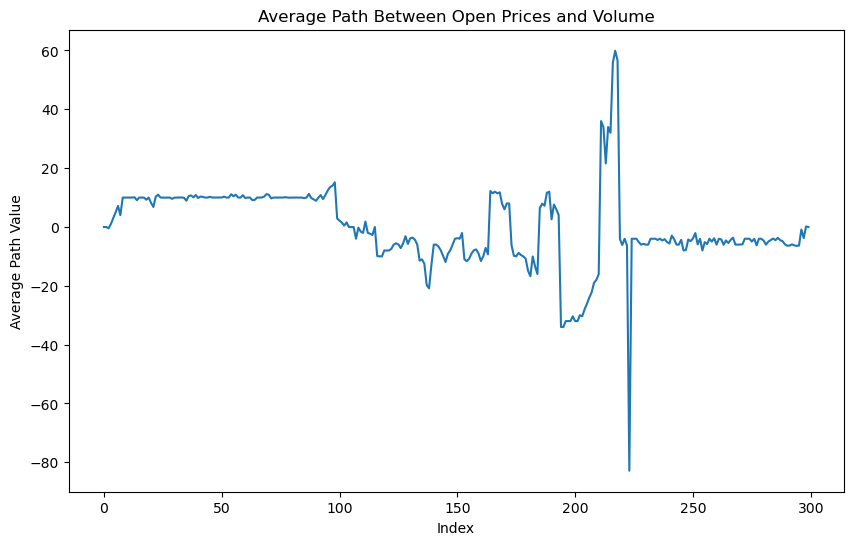

In [11]:
df_avg = pl.DataFrame().select(avg.alias("avg"))  

plot_lead_lag(df_avg)
